In [1]:
# Lire les deux premières ligne du ​ csv ​ des arbres de Grenoble (module ​ csv , ​voir doc officielle). Que représentent elles ?

# Imports full of trees as dictionary

import csv

with open('/home/campus-5/Documents/Project_arbre 2019 01 16/0. Data/ESP_PUBLIC.IDENTITE_ARBRE.csv', 'r') as file:
    tree_reader = csv.DictReader(file, delimiter=',')
    dict_tree_full = [];
    for row in tree_reader:
        dict_tree_full.append(row);

#Imports full of mayors as dictionary

import csv

with open('/home/campus-5/Documents/Project_arbre 2019 01 16/0. Data/Maire.csv', 'r') as file:
    mayor_reader = csv.DictReader(file, delimiter=',')
    dict_mayor_full = [];
    for row in mayor_reader:
        dict_mayor_full.append(row);

In [2]:
# Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (​ rows ) ​ et stocker ces informations dans une variable de type ​ List
# To create a list containing the data in column "ANNEEDEPLANTATION"

list_year_full = []

for row in dict_tree_full:
    list_year_full.append(row['ANNEEDEPLANTATION'])

# Afficher les 50 premières lignes et les 50 dernières lignes de cette liste.

print(list_year_full[:50], list_year_full[-50:])

['2001', '2001', '2001', '2001', '2001', '2001', '2001', '1975', '1975', '1975', '2001', '2001', '1975', '1975', '1975', '1975', '2001', '1975', '2001', '1975', '2001', '1975', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1969', '1965', '1965', '1965', '1965', '1965', '1965', '1965', '1965', '1965', '1965', '2003', '2003', '2003', '1985', '1985', '1985', '1985', '1985'] ['1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '1967', '2015', '1967', '1967', '1967', '1967', '1967', '1976', '1976', '1976', '1976', '1976', '1976', '1975', '1975', '1975', '2015', '', '', '1987', '1987', '1996', '1987', '1987', '1987', '1960', '1987', '1987', '1987', '1987', '1987', '1996', '1987', '1987']


In [3]:
# Pour combien d’arbres manque-t-il l’information concernant la date de plantation ?
# To count empty cells in data

counter_no_year = 0

for i in list_year_full:
    if i == '':
        counter_no_year += 1

# Alternatively
# counter = 0

# for n, i in enumerate(list_year_full):
#     if i == '':
#         counter += 1

# To calculate the number of trees with year of plantation record

print(len(list_year_full) - counter_no_year)

30422


In [4]:
# Extraire l’ensemble des lignes (​ rows ​ ) et stocker ces informations dans une variable de type ​ List
# To create a list of rows (list in list)
list_rows_full = []

for row in dict_tree_full:
    list_rows_full.append(row)

In [5]:
# Combien d’arbres sont recensés dans ce jeu de données ?
len(list_year_full)

31814

In [6]:
# Combien d’arbres ont été plantés en moyenne chaque année ? 

# To convert elements in the list of strings to integers:

list_year_int = []

for elem in list_year_full:
    if not (elem == ''):
        list_year_int.append(elem)

list_year_int = [int(i) for i in list_year_int]

# To calculate the average number of tree planted per year:

starting_year = min(list_year_int)
end_year = max(list_year_int)

average_trees_per_year = len(list_year_int) / (end_year - starting_year)

print(average_trees_per_year)

447.38235294117646


In [7]:
# Afficher tous les arbres ayant été plantés l’année de votre naissance. 

print(list_year_int.count(1990))

409


In [8]:
# Combien d’arbres ont été plantés depuis votre naissance ?

counter_tree_since_yob = 0
yob = 1990

for elem in list_year_int:
    if elem > yob:
        counter_tree_since_yob += 1
        
print(counter_tree_since_yob)

12639


In [9]:
# Quel Maire a planté le plus d’arbre à Grenoble ?	

# To make a dictionary containing the number of trees planted by each mayor
tree_by_mayor = {}

for myr in dict_mayor_full:
    start_year = myr['START']
    end_year = myr['END']
    first_name = myr['FIRST_NAME']
    last_name = myr['LAST_NAME']
        
    counter = 0
    for yr in dict_tree_full:
        if yr['ANNEEDEPLANTATION'] != '' and int(yr['ANNEEDEPLANTATION']) >= int(start_year) and int(yr['ANNEEDEPLANTATION']) <= int(end_year):
            counter += 1
    tree_by_mayor[(first_name + ' ' + last_name)] = counter

# To find the max value in my dictionary and return the key from the max-value

tbm_list = []
for i in tree_by_mayor:
    tbm = tree_by_mayor[i]
    tbm_list.append(tbm)

for name, tree in tree_by_mayor.items():  
    if tree == max(tbm_list):
        print(name)

Hubert Dubedout


In [10]:
# Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.
# First, take the full list of 'year planted' and rearrange the list in ascending order

list_year_asc = list_year_full 
list_year_asc.sort()

# Find the 'unique years' 

list_year_asc_unq = []

for x in list_year_asc:
    if x not in list_year_asc_unq:
        list_year_asc_unq.append(x)

# Find the number of trees per year by counting how many times 'unique trees' appear in the full list ascending of year planted

list_tree_p_year =[]

for o in list_year_asc_unq:
    counter = 0
    for u in list_year_asc:
        if o == u:
            counter += 1
    list_tree_p_year.append(counter)
print(list_tree_p_year)

# So now the integers contained in 'list_tree_p_year' - the number of trees per year corresponds to the years listed in 'list_year_asc_unq'

[1392, 417, 65, 730, 27, 6, 750, 88, 55, 114, 340, 1404, 69, 341, 33, 334, 3806, 943, 612, 870, 355, 1483, 619, 436, 304, 654, 973, 229, 758, 257, 302, 409, 145, 224, 143, 279, 759, 379, 233, 217, 584, 447, 1615, 328, 350, 349, 400, 607, 153, 217, 675, 459, 525, 334, 324, 877, 991, 478, 412, 135]


In [11]:
# Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.
# Import matplotlib and plot bar graph of trees per year and unique year

import matplotlib.pyplot as plt

y = list_tree_p_year
x = list_year_asc_unq

plt.bar(x, y)
plt.show()

# ALTERNATIVELY!!! - once you have an ascending order of planted year (without empty cells as integers)

# import matplotlib.pyplot as plt

# plt.hist(list_year_asc)
# plt.show()

# #OR! - to have a similar graph as the bar graph above

# import matplotlib.pyplot as plt

# plt.hist(list_year_asc,bins=list(range(1950, 2018)))
# plt.show()

<Figure size 640x480 with 1 Axes>

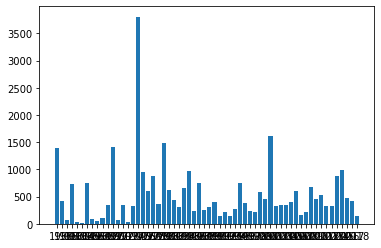

In [12]:
import matplotlib.pyplot as plt

y = list_tree_p_year
x = list_year_asc_unq

plt.bar(x, y)
plt.show()

In [13]:
# Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste.

# Make a list of genres

list_genre_full = []

for gn in dict_tree_full:
    list_genre_full.append(gn['GENRE_BOTA'])

# Create tuple using the merge of the 2 lists

tuple_genus_year = tuple(list(zip(list_year_full, list_genre_full)))

In [14]:
# Pour combien d’arbre manque-t-il l’information concernant le genre botanique ?
30750

# Use a for loop with an if condition to count the second values in each item in the tuple if not empty

counter_tree_with_genre = 0
for x in tuple_genus_year:
    if x[1] != '':
        counter_tree_with_genre += 1
print(counter_tree_with_genre)

30750


In [15]:
# Triez les tuples en fonction de l’année de plantation par ordre décroissant.

from operator import itemgetter, attrgetter

tuple_genus_year_des = tuple_genus_year

sorted(tuple_genus_year_des, key=itemgetter(0), reverse=True)

[('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Carpinus'),
 ('2018', 'Pinus'),
 ('2018', 'Acer'),
 ('2018', 'Cupressocyparis'),
 ('2018', 'Acer'),
 ('2018', 'Platanus'),
 ('2018', 'Cupressocyparis'),
 ('2018', 'Acer'),
 ('2018', 'Pinus'),
 ('2018', 'Fraxinus'),
 ('2018', 'Gleditsia'),
 ('2018', 'Gleditsia'),
 ('2018', 'Fraxinus'),
 ('2018', 'Fraxinus'),
 ('2018', 'Liquidambar'),
 ('2018', 'Liquidambar'),
 ('2018', 'Fraxinus'),
 ('2018', 'Fraxinus'),
 ('2018', 'Fraxinus'),
 ('2018', 'Pinus'),
 ('2018', 'Fraxinus'),
 ('2018', 'Acer'),
 ('2018', 'Sterculia'),
 ('2018', 'Eleagnus'),
 ('2018', 'Acer'),
 ('2018', 'Celtis'),
 ('2018', 'Acer'),
 ('2018', 'Photinia'),
 ('2018', 'Quercus'),
 